## **Final Project**

Team Member :
1. Arief Bagus Nugraha
2. Dhias Renaldy Hendrawan
3. Nabilah Astiarini
4. Paulus Marpaung
5. Sinta Ahwalisa Putri

Batch  : CODA-RMT-013  

Dashboard : [Credit Card Transaction Behavior & Fraud Analysis](https://lookerstudio.google.com/reporting/14a40871-255f-4995-9e22-883a2eb1a0b6)

This program is developed to perform data processing and exploratory analysis on a credit card transactions dataset sourced from Kaggle.
The dataset contains information about transaction records, including information on transaction time, transaction amount, user attributes, and merchant details.

The main stages covered in this program include:
- loading the dataset into the Python environment
- data understanding to examine the structure and characteristics of the dataset
- data type conversion and consistency checking
- feature engineering to support further analysis
- exploratory data analysis (EDA) to identify patterns and key characteristics within the data

The analysis conducted in this notebook is exploratory and descriptive. The objective is to develop an initial understanding of transaction behavior and fraud-related patterns in the dataset, which may serve as a foundation for subsequent analytical approaches.

The final output consists of a cleaned and processed dataset, along with summarized insights derived from exploratory analysis.


=============================================================================


## **1. Data Loading**

This section covers the process of loading the credit card transactions dataset into the Python environment and performing initial checks to ensure the data is successfully imported.

The dataset used in this analysis is sourced from [Kaggle]("https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset").

In [ ]:
import kagglehub
import os
import pandas as pd
DATASET_ROOT_DIR = "/content/datasets"


path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")
print("Path to dataset files:", path)
if not os.path.exists(DATASET_ROOT_DIR):
    os.makedirs(DATASET_ROOT_DIR)
os.system("cp -r {}/* {}".format(path, DATASET_ROOT_DIR))
print("Path to dataset files:", path)

100%|██████████| 145M/145M [00:05<00:00, 26.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/priyamchoksi/credit-card-transactions-dataset/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/priyamchoksi/credit-card-transactions-dataset/versions/1


In [ ]:
df = pd.read_csv('/content/datasets/credit_card_transactions.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


## **2. Data Understanding**
This section aims to understand the structure and key characteristics of the dataset, including variable types and data size to support data preparation and analysis.


### **2.1. Dataset Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Check missing value proportion of `merch_zipcode` column
195973/1296675

0.15113501841247806

Based on the initial dataset overview using df.info():

- The dataset consists of approximately 1.29 million transaction records with a total of 24 columns.

- Most columns are complete with no missing values. Only the merch_zipcode column contains missing values (around 15%). Since merchant location is already well represented by latitude and longitude coordinates, this column will not be imputed and will be handled cautiously in the next steps.

- Several columns, such as trans_date_trans_time (transaction timestamp) and dob (date of birth), are currently stored as object data types. These columns will be converted to appropriate datetime formats in the data type conversion step.

- Other numerical columns, such as transaction amount, latitude, longitude, and population fields, already have suitable numeric data types, while categorical attributes are stored as object/string types and will be retained as is for analysis.

- The Unnamed: 0 column is identified as an index from the raw CSV file and will be dropped during the cleaning process.

- The merchant column will be cleaned by removing the "fraud_" prefix to  improve readability and avoid analytical confusion.

All transformations will be applied in the subsequent data type conversion and cleaning stage.


### **2.2. Duplicate Record Check**

In [ ]:
df.groupby('trans_num').agg({'cc_num':'count'}).sort_values('cc_num')

,cc_num
trans_num,
ffffb8e3e4a2c7ea753eeec1601d34d6,1
ffffaf35c5a6eabb3788431eba975c60,1
ffff98c97c296a230f72988ac2416b3a,1
ffff8467c6542657204031920f5fa063,1
ffff7fd0a57a46691fb4f7ba7a393555,1
...,...
0000ddb86257223f2e75b951bb6b1c13,1
0000d3f43ee755ae8a702153b0fc7510,1
ffffdd4a4136ac60e6a12e15c50be29d,1


Based on grouping by transaction number indicates that each trans_num appears exactly once, indicating no duplicated transaction records in the raw Kaggle dataset.

## **3. Data Type Conversion and Basic Cleaning**

At this stage, data preparation focuses on basic cleaning and data type alignment.




### **3.1. Dropping Irrelevant Columns**
The Unnamed: 0 column is removed as it is an index from the raw CSV file and does not provide analytical value.

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

### **3.2. Data Type Conversion (Date Type)**
Date-related columns are converted to datetime format to enable time-based analysis and age calculation.

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [ ]:
df['trans_date_trans_time'].dtypes

dtype('<M8[ns]')

In [ ]:
df['dob'].dtypes

dtype('<M8[ns]')

### **3.3. Data Cleaning (Merchant Name)**
The fraud_ prefix in the merchant column is removed to improve readability.


In [ ]:
df['merchant'] = df['merchant'].str.replace('fraud_', '', regex=True)

In [ ]:
df['merchant'].head()

,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


## **4. Feature Engineering**

This section focuses on creating additional features derived from the original dataset to simplify exploratory analysis and highlight relevant patterns related to user behavior and transaction characteristics.


### **4.1. Age**
User age is calculated based on the user's date of birth and the corresponding transaction date.

In [ ]:
# Normalize transaction timestamp to remove time component
df['trans_date'] = df['trans_date_trans_time'].dt.normalize()


Transaction timestamps include time information, which is not required
for age calculation. Normalization reset the time component of datetime data to midnight (00:00:00) while keeping the datetime format consistent.

In [ ]:
# Calculate age at the time of transaction
# Age is approximated in years by dividing day difference by 365
df['age'] = (df['trans_date'] - df['dob']).dt.days // 365

In [ ]:
df['age'].sort_values().unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

### **4.2. Time Category**

Transaction time categories are defined based on common daily activity patterns. This segmentation helps capture behavioral differences and supports time-based risk analysis.


In [ ]:
# Time categorization is used as an analytical approach to segment transactions by general operating hours.

# Extract transaction hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Define time categories based on daily activity patterns
def time_category(hour):
    if 8 <= hour <= 17:
        return 'Business Hours'
    elif 18 <= hour <= 22:
        return 'Non-Business Hours'
    else:
        return 'Late Night'

# Apply categorization
df['transaction_time_category'] = df['trans_hour'].apply(time_category)

In [ ]:
# Extract transaction month
df['trans_month'] = df['trans_date_trans_time'].dt.month

# Extract day of week (Monday–Sunday)
df["trans_day_of_week"] = df["trans_date_trans_time"].dt.day_name()

### **4.3. User's Identifier**
A proxy user ID is created as a substitute identifier to enable user-level analysis.

In [ ]:
# Create a proxy user identifier using stable customer attributes
df['user_id'] = (
    df['first'].astype(str) + '_' +
    df['last'].astype(str) + '_' +
    df['gender'].astype(str) + '_' +
    df['city'].astype(str)
)

In [ ]:
df['user_id'].head().unique()

array(['Jennifer_Banks_F_Moravian Falls', 'Stephanie_Gill_F_Orient',
       'Edward_Sanchez_M_Malad City', 'Jeremy_White_M_Boulder',
       'Tyler_Garcia_M_Doe Hill'], dtype=object)

### **4.4. City Category**
City categories are derived based on city population size to group locations into broader geographic segments and simplify spatial analysis.

In [ ]:
df['city_pop'].describe()

,city_pop
count,1.296675e+06
mean,8.882444e+04
std,3.019564e+05
min,2.300000e+01
25%,7.430000e+02
50%,2.456000e+03
75%,2.032800e+04
max,2.906700e+06


In [ ]:
# Define city categories based on city population *thresholds adapted from the World Bank framework.
def city_category(pop):
    if pop < 5000:
        return 'Rural'
    elif pop < 30000:
        return 'Small Town'
    elif pop < 100000:
        return 'Medium Town'
    elif pop < 500000:
        return 'Urban'
    else:
        return 'Metropolitan'

df['city_category'] = df['city_pop'].apply(city_category)

### **4.5. Distance Between Transaction and Merchant**

Transaction–merchant distance is calculated using geographic coordinates to support spatial analysis.

In [ ]:
# Calculate Distance Miles betweet Transaction and Merchant
import numpy as np

def haversine_miles(lat1, lon1, lat2, lon2):
    r = 3958.8  # Earth radius in miles

    lat1, lon1, lat2, lon2 = map(
        np.radians, [lat1, lon1, lat2, lon2]
    )

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = (
        np.sin(dlat / 2)**2
        + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    )

    c = 2 * np.arcsin(np.sqrt(a))

    return np.round(r * c, 2)

In [ ]:
# Create new column
df['distance_miles'] = haversine_miles(
    df['lat'],
    df['long'],
    df['merch_lat'],
    df['merch_long']
)

## **5. Exploratory Analysis**

This section explores the dataset to understand transaction patterns, user characteristics, and the distribution of fraud. The analysis is conducted using descriptive statistics and visualizations to support further analysis.


In [ ]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import norm, skew, kurtosis, chi2_contingency, mannwhitneyu
from statsmodels.distributions.empirical_distribution import ECDF

### **Univariate Analysis**

This subsection examines individual variables to understand their distributions and basic characteristics.


#### **5.1. Transaction Amount**

In [ ]:
#Transaction Amount
def univariate(dataset, quan, round_decimals=2):
    descriptive = pd.DataFrame(
        index=[
            # Core statistics
            "count",
            "mean",
            "median",
            "mode",
            "min",
            "max",
            "range",
            "q1",
            "q3",
            "iqr",
            "variance",
            "std_dev",
            "skewness",
            "kurtosis",

            # Outlier analysis
            "lower_bound",
            "upper_bound",
            "outlier_count",
            "outlier_pct",
        ],
        columns=quan
    )

    for column in quan:
        series = dataset[column].dropna()

        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = series[(series < lower_bound) | (series > upper_bound)]

        # Log transform
        log_series = np.log1p(series[series > 0])

        descriptive.loc["count", column] = series.count()
        descriptive.loc["mean", column] = series.mean()
        descriptive.loc["median", column] = series.median()
        descriptive.loc["mode", column] = (
            series.mode().iloc[0] if not series.mode().empty else np.nan
        )
        descriptive.loc["min", column] = series.min()
        descriptive.loc["max", column] = series.max()
        descriptive.loc["range", column] = series.max() - series.min()
        descriptive.loc["q1", column] = q1
        descriptive.loc["q3", column] = q3
        descriptive.loc["iqr", column] = iqr
        descriptive.loc["variance", column] = series.var()
        descriptive.loc["std_dev", column] = series.std()
        descriptive.loc["skewness", column] = skew(series)
        descriptive.loc["kurtosis", column] = kurtosis(series)

        descriptive.loc["lower_bound", column] = lower_bound
        descriptive.loc["upper_bound", column] = upper_bound
        descriptive.loc["outlier_count", column] = outliers.count()
        descriptive.loc["outlier_pct", column] = (
            outliers.count() / series.count() * 100
        )

    return descriptive.round(round_decimals)

In [ ]:
univariate(df, ["amt"])

,amt
count,1296675
mean,70.351035
median,47.52
mode,1.14
min,1.0
max,28948.9
range,28947.9
q1,9.65
q3,83.14
iqr,73.49


Based on the descriptive analysis, transaction amounts show the following characteristics:

a. Central Tendency
- Mean ≈ 70.35
- Median ≈ 47.52
- Mode ≈ 1.14

This indicates that most transactions are small, but a small number of very large transactions inflate the mean. The median is a much better representation of a “typical” transaction.

b. Range & spread
- Min = 1.0
- Max = 28,948.9
- Range ≈ 28,948
- IQR = 73.49
- Middle 50% of transactions lie between 9.65 and 83.14
- STD = 160.32 (> 2× the mean)

This indicates that the distribution spans several orders of magnitude, with most values concentrated at the low end and extreme values stretching far to the right.

c. Shape
- Skewness ≈ 42.28 (|skew| > 2 → extreme)
- Kurtosis = 4545.63 (3 → heavy tails)

This indicates that the amount distribution has an extremely long right tail, where a tiny fraction of transactions contributes disproportionately to total variance (dominated by extreme outliers).

d. Outliers
- Upper bound (IQR method) ≈ 193
- Outliers = 67,290 transactions
- Outlier % ≈ 5.19%

This indicates that only ~5% of transactions are classified as outliers, yet they heavily distort the mean, variance, skewness, and kurtosis.


**Key takeway:**

Transaction amounts exhibit a highly right-skewed distribution dominated by a small number of large transactions. While these outliers represent only around 5% of observations, they substantially influence the mean and overall variance. As a result, median-based metrics provides a more stable and representative basis for analysis.

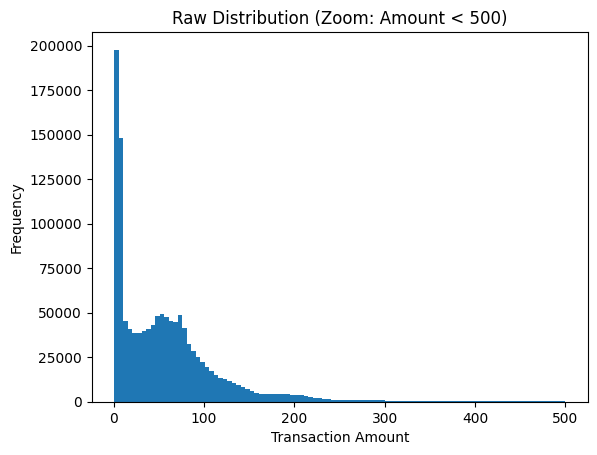

In [ ]:
#skewness
data = df["amt"]
plt.figure()
plt.hist(data[data < 500], bins=100)
plt.title("Raw Distribution (Zoom: Amount < 500)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

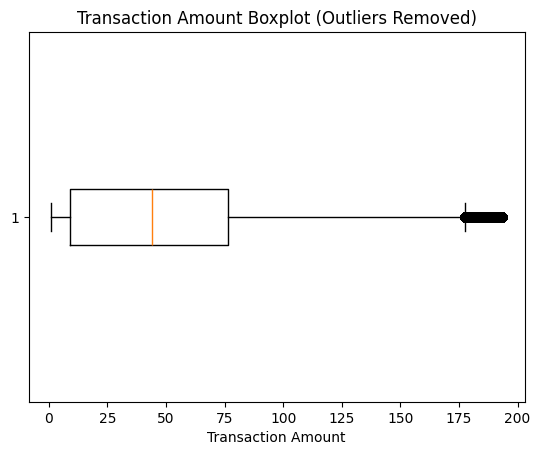

In [ ]:
# 1. Define the series
data = df["amt"].dropna()

# 2. Compute IQR
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

# 3. Define bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 4. Remove outliers
data_no_outliers = data[
    (data >= lower_bound) & (data <= upper_bound)
]

# 5. Boxplot without outliers
plt.figure()
plt.boxplot(data_no_outliers, vert=False)
plt.title("Transaction Amount Boxplot (Outliers Removed)")
plt.xlabel("Transaction Amount")
plt.show()

In [ ]:
# dataset period
df = df[
    (df["trans_date"] >= "2019-01-01") &
    (df["trans_date"] <= "2020-06-21")
].copy()

df["month"] = df["trans_date"].dt.to_period("M")

In [ ]:
#snapshot per user per month funct
df_monthly_user = (
    df
    .sort_values("trans_date")
    .groupby(["month"], as_index=True)
    .mean("amt")
)

#snapshot per user per month
df_monthly_user["amt"]

,amt
month,
2019-01,71.580200
2019-02,72.286974
2019-03,70.876195
2019-04,69.941899
2019-05,69.774766
2019-06,70.138472
2019-07,69.795680
2019-08,69.223419
2019-09,70.059367


Based on the analysis, the average transaction amount remains stable across months, fluctuating within a narrow range of approximately 69 to 72 from January 2019 to June 2020.

#### **5.2. Merchant**

In [ ]:
# Merchant transaction count per month

monthly_merchant_dist = (
    df
    .groupby(["month", "merchant"])
    .size()
    .reset_index(name="transaction_count")
)

monthly_merchant_dist["month"] = (
    monthly_merchant_dist["month"].astype(str)
)

monthly_merchant_dist.sort_values(
    ["month", "transaction_count"],
    ascending=[True, False]
)

,month,merchant,transaction_count
105,2019-01,Cormier LLC,178
316,2019-01,Kilback LLC,165
70,2019-01,Boyer PLC,150
571,2019-01,Schumm PLC,139
136,2019-01,Dickinson Ltd,138
...,...,...,...
11931,2020-06,Ebert-Daugherty,27
12204,2020-06,"Medhurst, Labadie and Gottlieb",27
11997,2020-06,Hackett Group,26
12002,2020-06,"Hahn, Douglas and Schowalter",26


In [ ]:
# Top merchant monthly

# Total transactions per month

monthly_total = (
    monthly_merchant_dist
    .groupby("month")["transaction_count"]
    .sum()
    .reset_index(name="total_transactions")
)

# Top merchant per month

top_merchants_monthly = (
    monthly_merchant_dist
    .merge(monthly_total, on="month")
    .sort_values(["month", "transaction_count"], ascending=[True, False])
    .groupby("month")
    .head(1)
)

# Percentage contribution

top_merchants_monthly["transaction_pct"] = (
    top_merchants_monthly["transaction_count"]
    / top_merchants_monthly["total_transactions"] * 100
)

top_merchants_monthly

,month,merchant,transaction_count,total_transactions,transaction_pct
105,2019-01,Cormier LLC,178,52525,0.338886
1264,2019-02,Schumm PLC,170,49866,0.340914
1702,2019-03,Kilback LLC,253,70939,0.356644
2395,2019-04,Kilback LLC,242,68078,0.355475
3088,2019-05,Kilback LLC,237,72532,0.326752
3781,2019-06,Kilback LLC,288,86064,0.334635
4474,2019-07,Kilback LLC,293,86596,0.338353
5167,2019-08,Kilback LLC,296,87359,0.338832
5860,2019-09,Kilback LLC,223,70652,0.315632
6553,2019-10,Kilback LLC,234,68758,0.340324


Based on the analysis, the top merchant in each month contributes a relatively small share of total transactions, typically ranging between 0.30% and 0.42%.

Although certain merchants, such as Kilback LLC, appear frequently as the top merchant across months, overall transaction activity remains widely distributed across many merchants.

#### **5.3. Transaction-Merchant Distance (Miles)**

In [ ]:
def univariate(df, cols, round_decimals=3):
    descriptive = pd.DataFrame(
        index=[
            "count",
            "mean",
            "median",
            "min",
            "max",
            "q1",
            "q3",
            "iqr",
            "std_dev",
            "skewness",
            "kurtosis"
        ],
        columns=cols
    )

    for col in cols:
        s = df[col].dropna()

        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)

        descriptive.loc["count", col] = s.count()
        descriptive.loc["mean", col] = s.mean()
        descriptive.loc["median", col] = s.median()
        descriptive.loc["min", col] = s.min()
        descriptive.loc["max", col] = s.max()
        descriptive.loc["q1", col] = q1
        descriptive.loc["q3", col] = q3
        descriptive.loc["iqr", col] = q3 - q1
        descriptive.loc["std_dev", col] = s.std()
        descriptive.loc["skewness", col] = skew(s)
        descriptive.loc["kurtosis", col] = kurtosis(s)

    return descriptive.round(round_decimals)

In [ ]:
univariate_distance = univariate(
    df,
    cols=["distance_miles"]
)

univariate_distance

,distance_miles
count,1296675
mean,47.295976
median,48.61
min,0.01
max,94.52
q1,34.38
q3,61.21
iqr,26.83
std_dev,18.092628
skewness,-0.236208


Based on the descriptive analysis, transaction amounts show the following characteristics:

a. Central Tendency

- Mean ≈ 47.30 miles
- Median ≈ 48.61 miles

This indicates that the mean and median are closely aligned, indicating that transaction distances are fairly balanced and not heavily influenced by extreme values. This suggests that a typical transaction occurs at a moderate distance from the merchant.

b. Range & Spread

- Min = 0.01 miles
- Max = 94.52 miles
- IQR = 26.83 miles
- Standard Deviation ≈ 18.09 miles

This indicates that transaction distances range from extremely close (likely in-store transactions) to moderately far distances (potentially online transactions).

The interquartile range shows that the middle 50% of transactions fall between approximately 34 and 61 miles.

c. Distribution Shape

- Skewness ≈ −0.24
- Kurtosis ≈ −0.63

This indicates that the distribution is close to symmetric with a slight left skew, meaning higher-distance transactions are relatively common but not dominant. The negative kurtosis indicates a flatter distribution, suggesting that transaction distances are spread evenly rather than clustered around a narrow range.

**Key Takeaways**
- Most transactions occur at tens of miles away from the merchant -> online shopping indication
- The distance distribution does not exhibit extreme outliers or abnormal spikes.
- Transaction distance does not appear to be an immediate indicator of suspicious behavior and should be interpreted alongside other behavioral and temporal features.

#### **5.4. Category**

In [ ]:
category_dist = (
    df["category"]
    .value_counts()
    .reset_index()
)

category_dist.columns = ["category", "transaction_count"]

category_dist["transaction_pct"] = (
    category_dist["transaction_count"]
    / category_dist["transaction_count"].sum() * 100
)

category_dist

,category,transaction_count,transaction_pct
0,gas_transport,131659,10.153585
1,grocery_pos,123638,9.535003
2,home,123115,9.494669
3,shopping_pos,116672,8.997783
4,kids_pets,113035,8.717296
5,shopping_net,97543,7.522548
6,entertainment,94014,7.250390
7,food_dining,91461,7.053502
8,personal_care,90758,6.999287
9,health_fitness,85879,6.623017


Based on the descriptive analysis, transaction activity is concentrated in a limited number of categories.

The largest categories include gas_transport, grocery_pos, and home, each contributing around 9–10% of total transactions, while categories such as travel and grocery_net account for a smaller share of overall activity.

#### **5.5. User Overview**

In [ ]:
# Total unique users
total_users = df["user_id"].nunique()

# Total transactions
total_transactions = df.shape[0]

# Transactions per user
user_txn = (
    df
    .groupby("user_id")
    .agg(total_txn=("trans_num", "count"))
    .reset_index()
)

user_txn.describe()

,total_txn
count,983.000000
mean,1319.099695
std,812.235900
min,7.000000
25%,525.000000
50%,1054.000000
75%,2025.000000
max,3123.000000


Based on the descriptive analysis, user transaction activity shows that:

- The dataset consists of 983 unique users with a total of 1,296,675 transactions.
- User transaction activity varies across the dataset, with the number of transactions per user ranging from 7 to 3,123 transactions.
- On average, each user performs approximately 1,319 transactions, while the median number of transactions per user is 1,054, indicating that half of the users conduct fewer than this number of transactions.
- The interquartile range shows that 50% of users perform between 525 and 2,025 transactions, reflecting moderate variability in transaction frequency across users.

#### **5.6. Credit Card Count per User**

In [ ]:
df.groupby("user_id")["cc_num"].nunique().value_counts()

,count
cc_num,
1,983


Based on the descriptive analysis, all users in the dataset are associated with exactly one credit card, indicating that transaction behavior is observed under a single-card-per-user structure.

#### **5.7. Age**

In [ ]:
univariate(
    df,
    cols=["age"]
)

,age
count,1296675
mean,45.528224
median,44.0
min,13
max,95
q1,32.0
q3,57.0
iqr,25.0
std_dev,17.408954
skewness,0.610871


Based on the descriptive analysis, it shows that:
- User age has a mean of approximately 45.5 years and a median of 44 years, indicating that the typical user falls within the mid-40s age range.
- A small number of underage users (below 18 years old) are observed in the dataset, which may reflect data inconsistencies or special card usage scenarios.
- Ages range from 13 to 95 years, with the middle 50% of users falling between 32 and 57 years (IQR = 25).
- The distribution shows mild right skewness (skewness = 0.61) and near-normal kurtosis (−0.18), suggesting a relatively balanced age distribution without extreme concentration at the tails.

In [ ]:
monthly_avg_age = (
    df
    .groupby("month")
    .agg(avg_user_age=("age", "mean"))
    .reset_index()
)

In [ ]:
monthly_avg_age["mom_change"] = (
    monthly_avg_age["avg_user_age"].diff()
)

In [ ]:
univariate_result = univariate(
    monthly_avg_age,
    cols=["avg_user_age", "mom_change"]
)

univariate_result

,avg_user_age,mom_change
count,18,17
mean,45.513072,0.077515
median,45.569068,0.090609
min,44.837544,-0.198677
max,46.155298,0.2816
q1,45.198125,0.049817
q3,45.769897,0.131932
iqr,0.571772,0.082114
std_dev,0.389971,0.118407
skewness,-0.175898,-0.685107


**Monthly Average User Age (avg_user_age)**

a. Central Tendency

- Mean ≈ 45.51
- Median ≈ 45.56
The close proximity between the mean and median indicates a well-balanced distribution without strong skewness.

b. Range & spread
- Min ≈ 44.83
- Max ≈ 46.15
- Total range ≈ 1.32 years
- STD ≈ 0.39
- IQR ≈ 0.57
Further indicate that monthly averages are tightly clustered, reflecting limited variation over time.

c. Shape
- Skewness ≈ -0.18
- Kurtosis = −1.04 (normal range: -1 to +1)
The skewness suggests a nearly symmetric distribution, while the kurtosis indicates a relatively flat distribution without heavy tails. This implies that monthly average age values are evenly distributed and not driven by extreme months.

**Key takeways:** The average age of active users remains highly stable across months, with minimal variation and no evidence of significant demographic shifts over time.

**B. Month-over-Month Change in Average Age (mom_change)**

a. Central Tendency
- Mean = 0.078
- Median = 0.091

Almost exactly natural aging progression over time.

b. Variability
- STD = 0.12
- IQR = 0.08

Month-to-month changes are generally small and consistent, reflecting low volatility in user age dynamics.

c. Extremes
- Min = −0.20
- Max = 0.28

Suggesting occasional months with slight shifts toward younger or older active users. However, these deviations are limited in magnitude and do not persist over time.

d. Shape
- Skewness = −0.69 (almost symetrical: -0.5 to +0.5)
- Kurtosis ≈ 0.24 (almost symetrical: -1 to +1)

Suggesting a near-normal distribution without extreme outliers.

**Key takeway:**
Month-to-month changes in average user age closely follow natural aging patterns, with minor and contained fluctuations. There is no evidence of abrupt demographic changes or structural shifts in the user base.

#### **5.8. Gender**

In [ ]:
gender_table = (
    df["gender"]
    .value_counts()
    .reset_index()
)

gender_table.columns = ["gender", "transaction_count"]

gender_table["transaction_pct"] = (
    gender_table["transaction_count"]
    / gender_table["transaction_count"].sum() * 100
)

gender_table

,gender,transaction_count,transaction_pct
0,F,709863,54.744867
1,M,586812,45.255133


Based on the descriptive analysis, female users account for a larger share of total transactions compared to male users, indicating higher transaction frequency at the transaction level.

In [ ]:
# Monthly transaction count by gender
monthly_gender = (
    df
    .groupby(["month", "gender"])
    .size()
    .reset_index(name="transaction_count")
)

monthly_total = (
    monthly_gender
    .groupby("month")["transaction_count"]
    .sum()
    .reset_index(name="total_transactions")
)

monthly_gender = monthly_gender.merge(monthly_total, on="month")

# Compute FEMALE % of total transactions per month

female_pct = (
    monthly_gender[monthly_gender["gender"] == "F"]
    [["month", "transaction_count"]]
    .rename(columns={"transaction_count": "female_transaction_count"})
)

female_pct = female_pct.merge(monthly_total, on="month")

female_pct["female_pct_of_total"] = (
    female_pct["female_transaction_count"]
    / female_pct["total_transactions"] * 100
)

# Merge female %

monthly_gender = monthly_gender.merge(
    female_pct[["month", "female_pct_of_total"]],
    on="month",
    how="left"
)

monthly_gender["month"] = monthly_gender["month"].astype(str)

# Separate tables readable

monthly_female = monthly_gender[monthly_gender["gender"] == "F"]
monthly_male   = monthly_gender[monthly_gender["gender"] == "M"]

monthly_female


,month,gender,transaction_count,total_transactions,female_pct_of_total
0,2019-01,F,28774,52525,54.781533
2,2019-02,F,27179,49866,54.504071
4,2019-03,F,38914,70939,54.855580
6,2019-04,F,37173,68078,54.603543
8,2019-05,F,39565,72532,54.548337
10,2019-06,F,47192,86064,54.833612
12,2019-07,F,47267,86596,54.583353
14,2019-08,F,47741,87359,54.649206
16,2019-09,F,38699,70652,54.774104
18,2019-10,F,37764,68758,54.923063


In [ ]:
monthly_male

,month,gender,transaction_count,total_transactions,female_pct_of_total
1,2019-01,M,23751,52525,54.781533
3,2019-02,M,22687,49866,54.504071
5,2019-03,M,32025,70939,54.855580
7,2019-04,M,30905,68078,54.603543
9,2019-05,M,32967,72532,54.548337
11,2019-06,M,38872,86064,54.833612
13,2019-07,M,39329,86596,54.583353
15,2019-08,M,39618,87359,54.649206
17,2019-09,M,31953,70652,54.774104
19,2019-10,M,30994,68758,54.923063


Based on the descriptive analysis, female users consistently account for approximately 54–55% of total transactions each month. Correspondingly, male users contribute the remaining 45–46% of monthly transactions, with similarly stable proportions over time.

This proportion remains stable over time, indicating no significant temporal shift in transaction activity by gender.

#### **5.9. Job**

In [ ]:
# user's job distribution

# 1. USER-LEVEL DATA (deduplicate users)

user_job = (
    df[["user_id", "job"]]
    .drop_duplicates(subset="user_id")
)

# 2. JOB DISTRIBUTION

job_distribution = (
    user_job
    .groupby("job")
    .size()
    .reset_index(name="user_count")
    .sort_values("user_count", ascending=False)
)

# 3. PERCENTAGE SHARE

job_distribution["user_pct"] = (
    job_distribution["user_count"]
    / job_distribution["user_count"].sum()) * 100


# 4. TOP 10 JOBS

top_jobs = job_distribution.head(10)

top_jobs

,job,user_count,user_pct
477,Trading standards officer,6,0.610376
110,"Copywriter, advertising",6,0.610376
286,Materials engineer,6,0.610376
308,Naval architect,6,0.610376
381,Quantity surveyor,6,0.610376
194,Financial adviser,5,0.508647
42,Audiological scientist,5,0.508647
439,"Surveyor, land/geomatics",5,0.508647
287,Mechanical engineer,5,0.508647
408,"Scientist, audiological",5,0.508647


Based on the descriptive analysis, user occupations are highly diverse, with no single job category dominating the user base.

The most common job categories each account for less than 1% of total users, indicating a fragmented distribution of occupations.

#### **5.10. Users Geographic**

In [ ]:
# user's geographic distribution

# 1. USER-LEVEL DATA (deduplicate users)

user_geo = (
    df[["user_id", "state", "city"]]
    .drop_duplicates(subset="user_id")
)

# 2. TOP 5 STATES BY USER COUNT

top_states = (
    user_geo
    .groupby("state")
    .size()
    .reset_index(name="user_count")
    .sort_values("user_count", ascending=False)
    .head(5)
)

top_states["user_pct"] = (
    top_states["user_count"]
    / top_states["user_count"].sum() * 100
)

# 3. TOP 5 CITIES BY USER COUNT

top_cities = (
    user_geo
    .groupby("city")
    .size()
    .reset_index(name="user_count")
    .sort_values("user_count", ascending=False)
    .head(5)
)

top_cities["user_pct"] = (
    top_cities["user_count"]
    / top_cities["user_count"].sum() * 100
)

# Outputs
top_states, top_cities


(   state  user_count   user_pct
 34    NY          71  25.448029
 43    TX          66  23.655914
 38    PA          58  20.788530
 4     CA          45  16.129032
 35    OH          39  13.978495,
               city  user_count  user_pct
 193         Dallas           5      25.0
 359        Houston           4      20.0
 212        Detroit           4      20.0
 564  New York City           4      20.0
 554         Naples           3      15.0)

Based on the descriptive analysis, users are geographically concentrated across several major states, with NY and TX representing the largest shares among the top states.

At the city level, user distribution is highly fragmented, with no single city dominating the user base.

#### **5.11. Fraud**

In [ ]:
# 1. OVERALL fraud distribution

overall_fraud_dist = (
    df["is_fraud"]
    .value_counts()
    .rename(index={0: "Non-Fraud", 1: "Fraud"})
    .reset_index(name="transaction_count")
    .rename(columns={"index": "transaction_type"})
)

overall_fraud_dist["transaction_pct"] = (
    overall_fraud_dist["transaction_count"]
    / overall_fraud_dist["transaction_count"].sum() * 100
)

# 2. MONTHLY fraud trend

monthly_fraud = (
    df
    .groupby("month")
    .agg(
        total_transactions=("is_fraud", "count"),
        fraud_transactions=("is_fraud", "sum")
    )
    .reset_index()
)

monthly_fraud["fraud_pct"] = (
    monthly_fraud["fraud_transactions"]
    / monthly_fraud["total_transactions"] * 100
)

monthly_fraud["month"] = monthly_fraud["month"].astype(str)

# Outputs
overall_fraud_dist, monthly_fraud

(    is_fraud  transaction_count  transaction_pct
 0  Non-Fraud            1289169        99.421135
 1      Fraud               7506         0.578865,
       month  total_transactions  fraud_transactions  fraud_pct
 0   2019-01               52525                 506   0.963351
 1   2019-02               49866                 517   1.036779
 2   2019-03               70939                 494   0.696373
 3   2019-04               68078                 376   0.552308
 4   2019-05               72532                 408   0.562510
 5   2019-06               86064                 354   0.411322
 6   2019-07               86596                 331   0.382235
 7   2019-08               87359                 382   0.437276
 8   2019-09               70652                 418   0.591632
 9   2019-10               68758                 454   0.660287
 10  2019-11               70421                 388   0.550972
 11  2019-12              141060                 592   0.419680
 12  2020-01     

In [ ]:
# Convert to datetime first
df["year_month"] = pd.to_datetime(df["trans_date"]).dt.to_period("M").astype(str)


In [ ]:
monthly_fraud = (
    df
    .groupby("year_month")
    .agg(
        total_transactions=("is_fraud", "count"),
        fraud_transactions=("is_fraud", "sum")
    )
    .reset_index()
)

monthly_fraud["fraud_pct"] = (
    monthly_fraud["fraud_transactions"]
    / monthly_fraud["total_transactions"] * 100
)


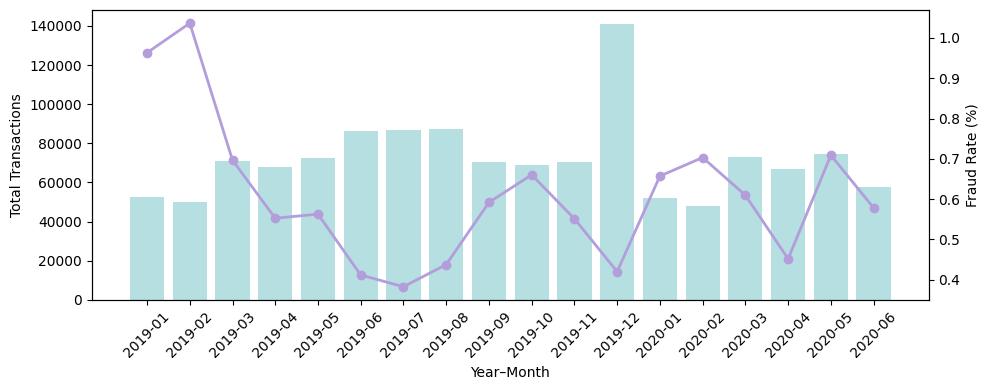

In [ ]:
import matplotlib.pyplot as plt

PASTEL_BLUE = "#A8DADC"
PASTEL_PURPLE = "#B39DDB"

fig, ax1 = plt.subplots(figsize=(10, 4))

# BAR — Total Transactions
ax1.bar(
    monthly_fraud["year_month"],
    monthly_fraud["total_transactions"],
    color=PASTEL_BLUE,
    alpha=0.85
)

ax1.set_xlabel("Year–Month")
ax1.set_ylabel("Total Transactions")
ax1.tick_params(axis="x", rotation=45)

# LINE — Fraud Rate (%)
ax2 = ax1.twinx()
ax2.plot(
    monthly_fraud["year_month"],
    monthly_fraud["fraud_pct"],
    color=PASTEL_PURPLE,
    marker="o",
    linewidth=2
)

ax2.set_ylabel("Fraud Rate (%)")

fig.tight_layout()
plt.show()


Interpretation:

- Fraud rates vary noticeably over time, indicating seasonal and behavioral patterns rather than a constant risk level.

- Early 2019 shows the highest fraud rates, peaking in February 2019 (1.04%), suggesting elevated risk during this period.

- From March to August 2019, fraud rates decline steadily, reaching their lowest levels in mid-2019 (around 0.38%–0.44%).

- Late 2019 shows a moderate rebound in fraud rates, with a slight increase toward October before stabilizing again in December, despite a sharp increase in transaction volume.

- In 2020, fraud rates remain relatively stable, fluctuating between 0.45% and 0.71%, with mild increases in February and May 2020.

- Importantly, several months with high transaction volumes (e.g., December 2019) do not correspond to proportionally higher fraud rates, indicating that volume alone does not drive fraud risk.

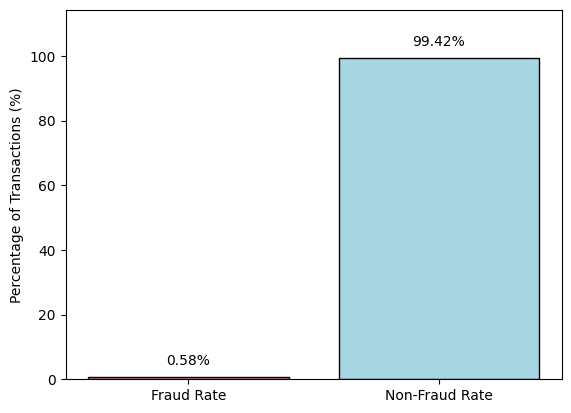

In [ ]:
import matplotlib.pyplot as plt

# Calculate overall fraud rate
total_txn = len(df)
fraud_txn = df["is_fraud"].sum()
fraud_rate_pct = fraud_txn / total_txn * 100

labels = ["Fraud Rate", "Non-Fraud Rate"]
values = [fraud_rate_pct, 100 - fraud_rate_pct]

colors = ['#f4a6a6', '#a8d5e2']  # pastel red & blue

plt.figure()
bars = plt.bar(labels, values, color=colors, edgecolor='black')

plt.ylabel("Percentage of Transactions (%)")

# ✅ Add headroom so labels never collide
plt.ylim(0, max(values) * 1.15)

# ✅ Safe label placement
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(values) * 0.03,
        f"{height:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()


In [ ]:
monthly_fraud["fraud_transactions"].describe()

,fraud_transactions
count,18.000000
mean,417.000000
std,82.611066
min,302.000000
25%,345.750000
50%,398.000000
75%,484.000000
max,592.000000


Based on the descriptive analysis, it shows that:

- Fraudulent transactions account for approximately 0.58% of all transactions, indicating that fraud is a relatively rare event in the dataset.

- At the monthly level, fraud rates remain consistently below 1.1%, with moderate fluctuations and no extreme spikes over time.

**Monthly Fraud Transaction**

- Central tendency
  - Mean = 417 frauds/month
  - Median = 398 frauds/month

- Variability
  - Std dev = 82.6 -> moderate

- Distribution (quartiles)
  - 25% of months ≤ 346 frauds
  - 50% of months ≤ 398 frauds
  - 75% of months ≤ 484 frauds

- Extremes
  - Min = 302 -> lowest fraud month: April
  - Max = 592 -> highest fraud month: December

**Key takeway:** Monthly fraud volume is relatively stable, centered around ~400 cases per month, with moderate fluctuations and no extreme outlier months.



### **Bivariate Analysis**

This subsection analyzes the relationship between selected features and fraud to identify potential patterns.


#### 6.1. Transaction Amount and Fraud

/tmp/ipython-input-3626767697.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


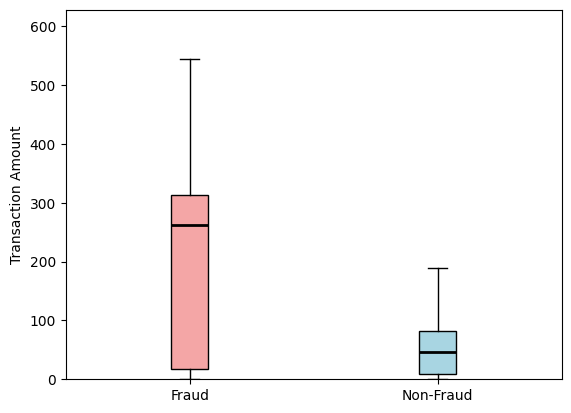

NameError: name 'p_value' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Cap extreme values for visualization
upper_cap = df["amt"].quantile(0.99)
plot_df = df[df["amt"] <= upper_cap]

data = [
    plot_df[plot_df["is_fraud"] == 1]["amt"],
    plot_df[plot_df["is_fraud"] == 0]["amt"]
]

fig, ax = plt.subplots()

bp = ax.boxplot(
    data,
    labels=["Fraud", "Non-Fraud"],
    showfliers=False,
    patch_artist=True,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# ✅ Set pastel colors safely
bp['boxes'][0].set_facecolor('#f4a6a6')  # pastel red (Fraud)
bp['boxes'][1].set_facecolor('#a8d5e2')  # pastel blue (Non-Fraud)

# Add headroom
ax.set_ylim(0, plot_df["amt"].max() * 1.15)

ax.set_ylabel("Transaction Amount")

plt.show()

# Interpretation
if p_value < 0.05:
    print("Conclusion: Transaction amount differs significantly between fraud and non-fraud cases.")
else:
    print("Conclusion: No statistically significant difference in transaction amount.")

a. Non-Fraud Transactions (is_fraud = 0)

- Represent the dominant population (~1.29M transactions).
- Typically low to moderate in value (median ~47, mean ~68).
- Highly right-skewed distribution with rare extreme outliers (99th percentile ~486, maximum ~28,949).

Most legitimate transactions cluster at relatively small amounts, while very large values occur infrequently and represent exceptional cases rather than typical behavior.

b. Fraud Transactions (is_fraud = 1)

- Account for a very small share of total transactions (~7.5K cases).
- Consistently higher transaction values (median ~397, mean ~531).
- Upper values are more tightly bounded (maximum ~1,376).

Fraud transactions are systematically high-value events, even at the median level, suggesting that fraud is more likely to occur at elevated transaction amounts rather than as isolated extreme outliers.

c. Comparative Insight (Fraud vs Non-Fraud)

- The boxplot comparison shows a clear upward shift in transaction amounts for fraud cases relative to non-fraud cases.
- This separation is statistically supported by the Mann–Whitney U test result (p < 0.05), indicating a significant difference between the two groups.

**Key Takeaway:**
Transaction amount strongly differentiates fraud from non-fraud cases, making it a critical feature for identifying fraudulent activity.

#### **6.2. Merchant and Fraud**

In [ ]:
# A merchant is considered exposed to fraud if it has at least one fraudulent transaction.
merchant_fraud_flag = (
    df
    .groupby("merchant")["is_fraud"]
    .max()   # 1: fraud, 0: non-fraud
    .reset_index(name="ever_fraud")
)

merchant_fraud_summary = (
    merchant_fraud_flag
    .groupby("ever_fraud")
    .size()
    .reset_index(name="merchant_count")
)

merchant_fraud_summary["status"] = merchant_fraud_summary["ever_fraud"].map(
    {0: "Never Experienced Fraud", 1: "Experienced Fraud"}
)

total_merchants = merchant_fraud_summary["merchant_count"].sum()

merchant_fraud_summary["percentage"] = (
    merchant_fraud_summary["merchant_count"] / total_merchants * 100
)

merchant_fraud_summary[["status", "merchant_count", "percentage"]]

Based on the analysis, almost all merchants in the dataset have experienced at least one fraudulent transaction. This high exposure rate is driven by the large transaction volume per merchant and the definition of exposure as having at least one fraud case.

Importantly, this does not imply that most merchants have high fraud risk. In fact, fraud intensity remains low for the majority of merchants, indicating that fraud is widespread but infrequent.

In [ ]:
# Fraud rate by merchant
fraud_by_merchant = (
    df
    .groupby("merchant")
    .agg(
        fraud_rate=("is_fraud", "mean"),
        transaction_count=("is_fraud", "count")
    )
    .reset_index()
)

# Sort by fraud rate
fraud_by_merchant.sort_values(
    "fraud_rate",
    ascending=False
).head(10)

In [ ]:
# Overall average fraud rate
overall_fraud_rate = df["is_fraud"].mean()
overall_fraud_rate

Based on the analysis, the merchants shown exhibit relatively higher fraud rates compared to the dataset average, while maintaining moderate transaction volumes. This suggests that the observed fraud rates are not driven by extremely small sample sizes.

However, the fraud rates remain low in absolute terms and do not imply merchant-specific misconduct. Instead, these patterns likely reflect differences in transaction exposure, payment channels, or customer behavior. Merchant-level results should therefore be interpreted as monitoring signals rather than direct indicators of merchant risk.

In [ ]:
# Create indicator for missing zip code of merchant
df["zip_missing"] = df["merch_zipcode"].isna()

# Fraud rate by zip missing status
fraud_by_zip_missing = (
    df
    .groupby("zip_missing")
    .agg(
        fraud_rate=("is_fraud", "mean"),
        transaction_count=("is_fraud", "count")
    )
    .reset_index()
)

fraud_by_zip_missing

Based on the analysis, fraud rates are nearly identical between transactions with missing and non-missing merchant ZIP codes. This indicates that the missing value of ZIP code information does not meaningfully affect fraud occurrence.

Therefore, missing ZIP code appears to be a data completeness issue rather than a useful risk signal for fraud detection.

#### **6.3. Transaction-Merchant Distance and Fraud**

In [ ]:
# Sanity check
df[["distance_miles", "is_fraud"]].isna().sum()

# Descriptive statistics
summary = (
    df
    .groupby("is_fraud")["distance_miles"]
    .agg(
        count="count",
        mean="mean",
        median="median",
        p90=lambda x: x.quantile(0.90),
        p99=lambda x: x.quantile(0.99),
        max="max"
    )
)
print(summary)

# Statistical test (non-parametric)
fraud_dist = df[df["is_fraud"] == 1]["distance_miles"]
nonfraud_dist = df[df["is_fraud"] == 0]["distance_miles"]

stat, p_value = mannwhitneyu(fraud_dist, nonfraud_dist, alternative="two-sided")
print(f"Mann–Whitney U p-value: {p_value}")

# Visualization
# Cap extreme values for visualization (to avoid flattened boxplot)
upper_cap = df["distance_miles"].quantile(0.99)
plot_df = df[df["distance_miles"] <= upper_cap]

plt.figure()
plt.boxplot(
    [
        plot_df[plot_df["is_fraud"] == 1]["distance_miles"],
        plot_df[plot_df["is_fraud"] == 0]["distance_miles"]
    ],
    labels=["Fraud", "Non-Fraud"],
    showfliers=False
)
plt.ylabel("Distance (miles)")
plt.title("Transaction Distance: Fraud vs Non-Fraud (≤ P99)")
plt.show()

# Conclusion
if p_value < 0.05:
    print(
        "Conclusion: Transaction distance differs significantly between fraud and non-fraud cases. "
    )
else:
    print(
        "Conclusion: Distance between user and merchant shows no statistically significant difference "
        "between fraud and non-fraud transactions."
    )

Based on the analysis, it shows that

- The boxplot shows substantial overlap in transaction distance distributions between fraud and non-fraud cases.

- Median transaction distance is very similar for both groups, with comparable interquartile ranges.

- Extreme distances are present in both fraud and non-fraud transactions, but no clear separation is observed.

- The Mann–Whitney U test further supports this observation, indicating no statistically significant difference in transaction distance between fraud and non-fraud transactions.

**Key Takeaways:** Transaction distance alone does not strongly distinguish fraud from non-fraud cases. While distance varies across transactions, its distribution is largely similar for both groups, suggesting limited discriminatory power when considered in isolation.

#### **6.4. Category and Fraud**

In [ ]:
fraud_by_category = (
    df.groupby("category")
    .agg(
        fraud_rate=("is_fraud", "mean"),
        transaction_count=("is_fraud", "count")
    )
    .reset_index()
    .sort_values("fraud_rate", ascending=False)
)

fraud_by_category

Based on the analysis, it shows that:

- Shopping_net exhibits the highest fraud rate (~1.76%), despite a moderate transaction volume.
- Misc_net follows with a fraud rate of approximately 1.45%.
- Grocery_pos ranks third with a fraud rate of around 1.41%, supported by a relatively large transaction volume.

**Key Takeaways:** Online-based categories, particularly shopping_net and misc_net, show noticeably higher fraud rates compared to in-store (POS) categories. This suggests that card-not-present transactions may carry elevated fraud risk relative to point-of-sale transactions.

#### **6.5. User Overview and Fraud**

In [ ]:
# Users with fraudulent transactions
fraud_users = df[df["is_fraud"] == 1]["user_id"].nunique()

# Total users with fraudulent transaction
fraud_users

# Fraud user percentage
fraud_user_percentage = (fraud_users / total_users) * 100
total_users, fraud_users, fraud_user_percentage

Based on the descriptive analysis, out of 983 unique users, 762 users have been involved in at least one fraudulent transaction, representing approximately 77.5% of the total user base.

This indicates that fraud occurrence in the dataset is highly concentrated at the user level, suggesting that fraudulent activity is more likely to involve users with repeated transactions rather than isolated, one-off events.

In [ ]:
# Fraud count by user
fraud_per_user = (
    df[df["is_fraud"] == 1]
    .groupby("user_id")
    .size()
    .reset_index(name="fraud_count")
)

fraud_per_user.describe()

In [ ]:
import matplotlib.pyplot as plt

stats = [{
    'med': 10,
    'q1': 8,
    'q3': 12,
    'whislo': 2,
    'whishi': 19,
    'fliers': []
}]

fig, ax = plt.subplots()

ax.bxp(
    stats,
    showfliers=False,
    patch_artist=True,   # required to fill color
    boxprops=dict(facecolor='#f4a6a6', edgecolor='black'),  # pastel red
    medianprops=dict(color='#b22222', linewidth=2),        # darker red median
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

ax.set_title("Boxplot of Fraud Count")
ax.set_ylabel("Fraud Count")

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# DISTINCT user counts
total_users = 983
fraud_users = 762          # <-- use your correct DISTINCT fraud user count
non_fraud_users = total_users - fraud_users

labels = ['Fraud Users', 'Non-Fraud Users']
values = [fraud_users, non_fraud_users]

# Pastel colors
colors = ['#f4a6a6', '#a8d5e2']  # pastel red & pastel blue

plt.figure()
bars = plt.bar(labels, values, color=colors, edgecolor='black')

plt.ylabel("Total Users")

# Headroom
plt.ylim(0, max(values) * 1.15)

# Value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(values) * 0.03,
        f"{int(height):,}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()


- The analysis covers 762 users associated with fraudulent transactions.
- The number of fraud occurrences per user ranges from 2 to 19, indicating that all fraudulent users exhibit repeated fraud behavior.
- On average, a fraudulent user is involved in approximately 9.9 fraud transactions, with a median of 10 fraud occurrences per user.
- The interquartile range shows that 50% of fraudulent users commit between 8 and 12 fraud transactions, suggesting relatively consistent fraud frequency among this group.

#### **6.6. Age and Fraud**

In [ ]:
# underage -> fraudulent signal?

# Create age groups with focus on underage
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 25, 35, 50, 100],
    labels=["Underage (<=18)", "19–25", "26–35", "36–50", "50+"],
    right=True
)

# Fraud comparison across age groups
age_fraud_comparison = (
    df
    .groupby("age_group")
    .agg(
        total_txn=("is_fraud", "count"),
        fraud_txn=("is_fraud", "sum"),
        fraud_rate_pct=("is_fraud", lambda x: x.mean() * 100)
    )
    .reset_index()
)

age_fraud_comparison

Based on the analysis, it shows that:

- Underage (≤18) users show a fraud rate of 0.65%, which is higher than most prime working-age groups (26–50) but lower than the 50+ segment.

- The 19–25 group has a similar fraud rate (0.61%), suggesting younger users exhibit comparable risk behavior, regardless of legal age.

- Prime-age groups (26–35 and 36–50) have the lowest fraud rates (~0.47%), indicating more stable and predictable transaction behavior.

- The 50+ group records the highest fraud rate (0.74%), suggesting increased vulnerability—potentially due to social engineering, scams, or lower digital literacy.

#### **6.7. Gender and Fraud**

In [ ]:
#fraud per gender distribution
fraud_gender_detail = (
    df
    .groupby("gender")
    .agg(
        fraud_rate=("is_fraud", "mean"),
        transaction_count=("is_fraud", "count")
    )
    .reset_index()
)

fraud_gender_detail

Based on the analysis, it shows  that:

- Female users exhibit a fraud rate of 0.53% across 709,863 transactions, while male users show a slightly higher fraud rate of 0.64% across 586,812 transactions.

- Although the difference in fraud rates between genders is relatively small (~0.11 percentage points), male transactions display a marginally higher propensity for fraud.

- Importantly, female users account for a larger share of total transactions, indicating that overall fraud volume is influenced not only by fraud rate but also by transaction activity levels.

In [ ]:
import matplotlib.pyplot as plt

labels = age_fraud_comparison["age_group"].astype(str)
values = age_fraud_comparison["fraud_rate_pct"]

# Different pastel color for each age group
colors = [
    '#f4a6a6',  # pastel red
    '#f6c1a9',  # pastel peach
    '#a8d5ba',  # pastel green
    '#a8d5e2',  # pastel blue
    '#cdb4db'   # pastel purple
]

plt.figure()
bars = plt.bar(labels, values, color=colors, edgecolor='black')

plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by Age Group")

# Add headroom
plt.ylim(0, max(values) * 1.2)

# Value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(values) * 0.03,
        f"{height:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()


In [ ]:
# Chi-square test
contingency = pd.crosstab(df["gender"], df["is_fraud"])
chi2, p, dof, expected = chi2_contingency(contingency)

chi2, p

Based on the Chi-square test, it shows that

- The gap between expected fraud counts and observed fraud counts is much bigger than random noise (Chi-square statistic = 75.51)

- There is a statistically significant association between gender and fraud ( p < 0.05 )

**Key Takeaway:** There is a statistically significant association between gender and fraud, but the effect size is small and gender alone is not a strong predictor.

In [ ]:
# fraud per gender per month

fraud_df = df[df["is_fraud"] == 1]

monthly_gender_fraud = (
    fraud_df
    .groupby(["month", "gender"])
    .size()
    .reset_index(name="fraud_count")
)

monthly_total_fraud = (
    monthly_gender_fraud
    .groupby("month", as_index=False)["fraud_count"]
    .sum()
    .rename(columns={"fraud_count": "total_fraud"})
)

monthly_fraud_pct = (
    monthly_gender_fraud
    .merge(monthly_total_fraud, on="month", how="left")
)

monthly_fraud_pct["fraud_pct"] = (
    monthly_fraud_pct["fraud_count"] /
    monthly_fraud_pct["total_fraud"] * 100
)

monthly_fraud_pct["month"] = monthly_fraud_pct["month"].astype(str)


In [ ]:
# female fraud % per month
fraud_female_monthly = (
    monthly_fraud_pct[monthly_fraud_pct["gender"] == "F"]
    .sort_values("month")
    .reset_index(drop=True)
)

fraud_female_monthly


In [ ]:
# fraud male monthly
fraud_male_monthly = (
    monthly_fraud_pct[monthly_fraud_pct["gender"] == "M"]
    .sort_values("month")
    .reset_index(drop=True)
)

fraud_male_monthly

Based on the analysis, it shows that:

a. Female Users

- Across months, female users account for a larger share of fraud cases, with fraud proportions generally ranging between ~30% and ~62% of total monthly fraud.
- In most months, female fraud contributions remain above 50%, indicating a consistently higher representation compared to male users.

**Key takeaway:** Fraudulent transactions involving female users tend to dominate in most months, suggesting that fraud exposure is more frequent among female-associated transactions at the transaction level.

b. Male Users

- Male users contribute a smaller but substantial share of fraud cases, typically ranging from ~38% to ~69% across months.
- While there are months where male users exceed female users in fraud share (e.g., April 2019, November 2019), these instances are not persistent over time.

**Key takeaway:** Male-related fraud activity fluctuates more across months and occasionally surpasses female fraud counts, but does not show a consistently dominant pattern.

c. Comparative Insight

- Fraud distribution by gender shows month-to-month variability, but the overall pattern remains relatively stable.
- No clear evidence suggests a structural shift in fraud dominance from one gender to another over time.

**Key Takeaway:** Fraud occurrence differs slightly by gender at the transaction level, with female users contributing a marginally higher share of fraud cases overall, while both genders exhibit stable patterns without extreme or sustained divergence.

#### **6.8. Job and Fraud**

In [ ]:
# Fraud rate by job
fraud_by_job = (
    df
    .groupby("job")
    .agg(
        fraud_rate=("is_fraud", "mean"),
        transaction_count=("is_fraud", "count")
    )
    .reset_index()
)
# Filter jobs with sufficient transaction volume
fraud_by_job_filtered = fraud_by_job[
    fraud_by_job["transaction_count"] >= 500
]

# Sort by fraud rate
fraud_by_job_filtered.sort_values(
    "fraud_rate",
    ascending=False
).head(10)

Based on the descriptive analysis, among job categories with at least 500 transactions, fraud rates vary moderately across occupations.
Lawyer shows the highest fraud rate (5.2%), followed by TEFL teacher and Community development worker (4%), while other jobs remain below this level with comparable transaction volumes.

#### **6.9. User Geographic and Fraud**

**State**

In [ ]:
# Fraud rate by state
fraud_by_state = (
    df
    .groupby("state")
    .agg(
        fraud_rate=("is_fraud", "mean"),
        transaction_count=("is_fraud", "count")
    )
    .reset_index()
)

# Sort by fraud rate
fraud_by_state.sort_values("fraud_rate", ascending=False).head(10)

Based on the analysis, states with very small transaction volumes may appear to have extremely high fraud rates, as seen in Delaware, where all observed transactions were fraudulent. However, this result is driven by a very limited number of transactions and does not represent a reliable geographic risk pattern.

Among states with substantial transaction volumes, fraud rates remain consistently low and relatively similar across regions. This suggests that apparent geographic differences in fraud are largely influenced by transaction volume rather than inherent state-level risk.

**City Population Category**

In [ ]:
# City Population in order Rural < Small < Medium < Urban < Metropolitan

# Fraud rate by city population category
fraud_by_city_category = (
    df
    .groupby("city_category")
    .agg(
        fraud_rate=("is_fraud", "mean"),
        transaction_count=("is_fraud", "count")
    )
    .reset_index()
)

# Sort by fraud rate
fraud_by_city_category.sort_values("fraud_rate", ascending=False)

Based on the analysis, fraud rates across city categories are relatively similar, with only small differences between rural, town, and urban areas. This indicates that city category does not have a strong influence on fraud risk.

Slightly higher fraud rates in urban areas are likely related to higher transaction activity rather than the city category itself. Overall, city category alone is not a meaningful indicator for predicting fraud.

#### **6.10. Time**

**Fraud rate by transaction time category**

In [ ]:
# Calculate fraud rate per category
fraud_by_hour_cat = (
    df
    .groupby("transaction_time_category")["is_fraud"]
    .mean()
    .reset_index(name="fraud_rate")
)

fraud_by_hour_cat

In [ ]:
# Plot fraud rate by hour category
plt.figure()
plt.bar(fraud_by_hour_cat["transaction_time_category"], fraud_by_hour_cat["fraud_rate"])
plt.xlabel("Transaction Hour Category")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Transaction Hour Category")
plt.show()

Based on the bar chart, fraud rates vary across transaction time categories.
Late Night transactions show the highest fraud rate (1.14%), followed by Non-Business Hours (0.68%), while Business Hours exhibit the lowest fraud rate (0.11%).

**Key takeaway:** Fraud is more likely to occur outside regular business hours, particularly during late-night periods.

**Fraud rate by transaction hour**

In [ ]:
fraud_by_hour = (
    df
    .groupby("trans_hour")["is_fraud"]
    .mean()
    .reset_index(name="fraud_rate")
)

fraud_by_hour

In [ ]:
# corr between transaction time hour category and fraud
df[["trans_hour", "is_fraud"]].corr(method="spearman")

In [ ]:
import matplotlib.pyplot as plt

hours = fraud_by_hour["trans_hour"]
values = fraud_by_hour["fraud_rate"]

plt.figure()

# ===== Define 5 contiguous time sections =====
n_sections = 5
section_size = int(len(hours) / n_sections) + 1

section_colors = [
    '#a8d5e2',  # pastel blue
    '#fde2a7',  # pastel yellow
    '#a8d5ba',  # pastel green
    '#cdb4db',  # pastel purple
    '#f6c1a9'   # pastel peach
]

colors = []
for i, h in enumerate(hours):
    section_idx = min(i // section_size, n_sections - 1)
    colors.append(section_colors[section_idx])

# ===== BAR CHART =====
bars = plt.bar(
    hours,
    values,
    color=colors,
    edgecolor='black',
    alpha=0.85,
    label='Fraud Rate (Hourly)'
)

# ===== LINE CHART (trend) =====
plt.plot(
    hours,
    values,
    color='#555555',
    linewidth=2,
    marker='o',
    label='Trend'
)

# ===== Labels =====
plt.xlabel("Transaction Hour")
plt.ylabel("Fraud Rate")
plt.legend()

# Headroom
plt.ylim(0, max(values) * 1.25)

plt.show()


Based on the chart, fraud rates vary significantly across transaction hours.
- The highest fraud rates occur during late-night to early-morning hours, particularly around 00:00–03:00 and again at 22:00–23:00, where fraud rates peak at approximately 2.8–3.0%.
- In contrast, fraud rates remain consistently low during daytime and regular business hours.

**Key takeaway**: Fraud activity is strongly time-dependent, with elevated risk concentrated during late-night hours when transaction monitoring and user oversight may be reduced.

**Fraud rate by day of week**

In [ ]:
# Set proper order for days
day_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

df["trans_day_of_week"] = pd.Categorical(
    df["trans_day_of_week"],
    categories=day_order,
    ordered=True
)

# Calculate fraud rate per day
fraud_by_day = (
    df
    .groupby("trans_day_of_week")["is_fraud"]
    .mean()
    .reset_index(name="fraud_rate")
    .sort_values("trans_day_of_week")
)

fraud_by_day

In [ ]:
# Plot fraud rate by day of week (horizontal bar chart)
plt.figure()
plt.barh(
    fraud_by_day["trans_day_of_week"],
    fraud_by_day["fraud_rate"]
)

plt.xlabel("Fraud Rate")
plt.ylabel("Day of Week")
plt.title("Fraud Rate by Day of Week")
plt.show()


Based on the descriptive analysis, fraud rates vary moderately across days of the week.

- Fraud activity peaks on Friday (0.71%), followed by Thursday and Wednesday, while Monday and Sunday exhibit the lowest fraud rates.
- Overall, fraud risk gradually increases toward the end of the workweek before declining during the weekend.

**Key takeaway:** Fraud tends to concentrate during late weekdays, potentially reflecting higher transaction volume or reduced vigilance approaching the weekend.

### **Rules**

#### 7.1. Age

In [ ]:
# age summary
age_summary = (
    df[["user_id", "age", "is_fraud"]] #duplicated user_id -> transaction level
    .groupby("age", as_index=False)
    .agg(
        total_users=("user_id", "count"),
        fraud_count=("is_fraud", "sum")
    )
)

In [ ]:
# cumulative from the top
# 1. Sort by age (youngest -> oldest)
age_cumsum = (
    age_summary
    .sort_values("age")
    .reset_index(drop=True)
)

age_cumsum["fraud_cumsum"] = (
    age_cumsum["fraud_count"].cumsum()
)

age_cumsum["total_users_cumsum"] = (
    age_cumsum["total_users"].cumsum()
)


# 2. Cumulative fraud share (%)
total_fraud = age_cumsum["fraud_count"].sum()
age_cumsum["fraud_cumsum_pct"] = (
    age_cumsum["fraud_count"].cumsum() / total_fraud * 100
)

# 3. USER VALIDATED
user_validated_cumsum = (
    (age_cumsum["total_users"] - age_cumsum["fraud_count"]).cumsum()
)

total_user_validated = (
    age_cumsum["total_users"] - age_cumsum["fraud_count"]
).sum()

# cumulative user validated share (%)
age_cumsum["user_validated_cumsum_pct"] = (
    user_validated_cumsum / total_user_validated * 100
)

age_cumsum["actual_fraud_rate"] = (
    age_cumsum["fraud_count"].sum() - age_cumsum["fraud_cumsum"]) * 100 / (age_cumsum["total_users"].sum() - age_cumsum["fraud_cumsum"])

age_cumsum


In [ ]:
age_cumsum[age_cumsum["user_validated_cumsum_pct"] > 19]

In [ ]:
import matplotlib.pyplot as plt

# Ensure data is sorted
df_plot = age_cumsum.sort_values("user_validated_cumsum_pct")

x = df_plot["user_validated_cumsum_pct"]
y = df_plot["actual_fraud_rate"]

plt.figure()

# Pastel green line
plt.plot(
    x,
    y,
    color='#a8d5ba',      # pastel green
    linewidth=2,
    marker='o',
    markersize=4,
    alpha=0.9
)

# Mark 20% validated users
target = 20
closest_idx = (x - target).abs().idxmin()

plt.scatter(
    x.loc[closest_idx],
    y.loc[closest_idx],
    color='#f4a6a6',      # pastel red highlight
    s=90,
    zorder=5,
    label='20% Users Validated'
)

plt.axvline(
    x=target,
    color='#7fbf9f',
    linestyle='--',
    linewidth=1,
    alpha=0.8
)

plt.xlabel("User Validated Cumulative (%)")
plt.ylabel("Actual Fraud Rate")
plt.title("Actual Fraud Rate After User Validation")
plt.legend()

plt.show()

In [ ]:
# cumulative from the bottom
# 1. Sort age: youngest -> oldest
age_risk_curve = (
    age_summary
    .sort_values("age", ascending=True)
    .reset_index(drop=True)
)

# fraud_cumsum
age_risk_curve["fraud_cumsum"] = (
    age_risk_curve["fraud_count"][::-1].cumsum()[::-1]
)

# total_users_cumsum
age_risk_curve["total_users_cumsum"] = (
    age_risk_curve["total_users"][::-1].cumsum()[::-1]
)

# 2. Fraud handled cumulative (COUNT)
age_risk_curve["fraud_handled_cumsum"] = (
    age_risk_curve["fraud_count"][::-1].cumsum()[::-1]  #cumulative from the bottom
)

# 3. Fraud handled cumulative (%)
total_fraud = age_risk_curve["fraud_count"].sum()

age_risk_curve["fraud_handled_cumsum_pct"] = (
    age_risk_curve["fraud_handled_cumsum"]
    / total_fraud
    * 100
)

# 4. User validated (COUNT)
age_risk_curve["user_validated"] = (
    age_risk_curve["total_users"] - age_risk_curve["fraud_count"]
)

# 5. User validated cumulative (COUNT) — cumulative from the bottom
age_risk_curve["user_validated_cumsum"] = (
    age_risk_curve["user_validated"][::-1].cumsum()[::-1]
)

# 6. User validated cumulative (%)
total_user_validated = age_risk_curve["user_validated"].sum()

age_risk_curve["user_validated_cumsum_pct"] = (
    age_risk_curve["user_validated_cumsum"]
    / total_user_validated
    * 100
)

# actual_fraud_rate
age_risk_curve["actual_fraud_rate"] = (
    age_risk_curve["fraud_count"].sum() - age_risk_curve["fraud_cumsum"]) * 100 / (age_risk_curve["total_users"].sum() - age_risk_curve["fraud_cumsum"])

age_risk_curve


In [ ]:
age_risk_curve[age_risk_curve["user_validated_cumsum_pct"] > 19]

In [ ]:
import matplotlib.pyplot as plt

df_plot = age_risk_curve.sort_values(
    "user_validated_cumsum_pct", ascending=False
)

x = df_plot["user_validated_cumsum_pct"]
y = df_plot["actual_fraud_rate"]

plt.figure()

# Pastel line
plt.plot(
    x,
    y,
    color='#9bbcd1',      # pastel blue
    linewidth=2,
    marker='o',
    markersize=4,
    alpha=0.9
)

# Highlight 20% point
target = 20
closest_idx = (x - target).abs().idxmin()

x_point = x.loc[closest_idx]
y_point = y.loc[closest_idx]

plt.scatter(
    x_point,
    y_point,
    color='#f4a6a6',      # pastel red
    s=80,
    zorder=5,
    label='20% Users Validated'
)

plt.axvline(
    x=target,
    color='#f4a6a6',
    linestyle='--',
    linewidth=1,
    alpha=0.7
)

# 🔹 Annotate point value
plt.annotate(
    f"{y_point:.2f}%",
    xy=(x_point, y_point),
    xytext=(5, 8),              # offset from point
    textcoords="offset points",
    fontsize=10,
    color='black'
)

plt.xlabel("User Validated Cumulative (%)")
plt.ylabel("Actual Fraud Rate")
plt.title("Actual Fraud Rate After User Validation")
plt.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt

rules = ["Youngest 20%", "Oldest 20%", "10% Young + 10% Old"]
fraud_uplift = [20.85, 24.84, 22.85]  # %

# Pastel palette
colors = ['#a8d5ba', '#a8d5e2', '#cdb4db']  # pastel blue, red, purple

plt.figure()
bars = plt.bar(rules, fraud_uplift, color=colors, edgecolor='black')

plt.ylabel("Fraud Handled Uplift (%)")
plt.title("Uplift in Fraud Reduction")

# Value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.2f}%",
        ha='center',
        va='bottom'
    )

plt.ylim(0, max(fraud_uplift) + 5)
plt.show()


##### 7.1.1. Rule-based Age Summary

Assumption: OTP budget -> 20% of transactions

  - rule 1 -> Top 20% youngest (age range = 13-30) -> user_validated_cumsum_pct = ~20.84% -> actual_fraud_rate -> 0.458187 from 0.578865 -> fraud handled uplift -> ~20.85%
  - rule 2 -> Bottom 20% Oldest (age range = 61-95) -> user_validated_cumsum_pct = ~19.65% -> actual_fraud_rate -> 0.435047 from 0.578865 -> fraud handled uplift -> ~24.84%
  - rule 1 & 2 -> 10% rule 1 + 10% rule 2 -> 0.060339 + 0.071909 = ~0.132248.26 or ~13.22% -> fraud handled uplift -> ~22.85%


  Key takeaway:

  By splitting the OTP budget evenly between the youngest and oldest user segments, we can handle approximately 22–23% of fraud, which outperforms targeting only younger users and balances effectiveness across risk groups.

#### 7.2. Transaction Hour

In [ ]:
# 1. Aggregate by transaction hour
hour_summary = (
    df
    .groupby("trans_hour")
    .agg(
        users_count=("is_fraud", "count"),
        fraud_count=("is_fraud", "sum")
    )
    .reset_index()
)

# 2. Sort hour (TOP → BOTTOM)
hour_sum = (
    hour_summary
    .sort_values("trans_hour", ascending=True)
    .reset_index(drop=True)
)

# fraud cumsum
hour_sum["fraud_cumsum"] = (
    hour_sum["fraud_count"].cumsum()
)

# users cumsum
hour_sum["users_count_cumsum"] = (
    hour_sum["users_count"].cumsum()
)

# 3. Fraud handled cumulative (COUNT) — FROM TOP
hour_sum["fraud_handled_cumsum"] = (
    hour_sum["fraud_count"].cumsum()
)

# 4. Fraud handled cumulative (%)
total_fraud = hour_sum["fraud_count"].sum()

hour_sum["fraud_handled_cumsum_pct"] = (
    hour_sum["fraud_handled_cumsum"]
    / total_fraud
    * 100
)

# 5. User validated (COUNT)
hour_sum["user_validated"] = (
    hour_sum["users_count"] - hour_sum["fraud_count"]
)

# 6. User validated cumulative (COUNT) — FROM TOP
hour_sum["user_validated_cumsum"] = (
    hour_sum["user_validated"].cumsum()
)

# 7. User validated cumulative (%)
total_user_validated = hour_sum["user_validated"].sum()

hour_sum["user_validated_cumsum_pct"] = (
    hour_sum["user_validated_cumsum"]
    / total_user_validated
    * 100
)

# actual_fraud_rate
hour_sum["actual_fraud_rate"] = (
    hour_sum["fraud_count"].sum() - hour_sum["fraud_cumsum"]) * 100 / (hour_sum["users_count"].sum() - hour_sum["fraud_cumsum"])

hour_sum

In [ ]:
# Rule definition: 10 PM – 11:59 PM
night_rule = df[
    (df["trans_hour"] >= 22) & (df["trans_hour"] <= 23)
]

fraud_captured_pct = (
    night_rule["is_fraud"].sum()
    / df["is_fraud"].sum()
    * 100
)

fraud_captured_pct

In [ ]:
# legitimate users impact
users_impacted_pct = (
    (night_rule.shape[0] - night_rule["is_fraud"].sum())
    / (df.shape[0] - df["is_fraud"].sum())
    * 100
)

users_impacted_pct


In [ ]:
import matplotlib.pyplot as plt

metrics = ["Fraud Rate Captured(%)", "Transactions Validated Cumulative (%)"]
values = [fraud_captured_pct, users_impacted_pct]

plt.figure()

# Pastel color palette
pastel_colors = ["#A7C7E7", "#B8E0D2"]  # soft blue, soft green

bars = plt.bar(metrics, values, color=pastel_colors)

plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()

Interpretation:

By combining the 10–11 PM and 11–12 PM windows, the rule captures ~51% of total fraud while impacting ~10% of legitimate users, making it an effective late-night fraud control.